C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


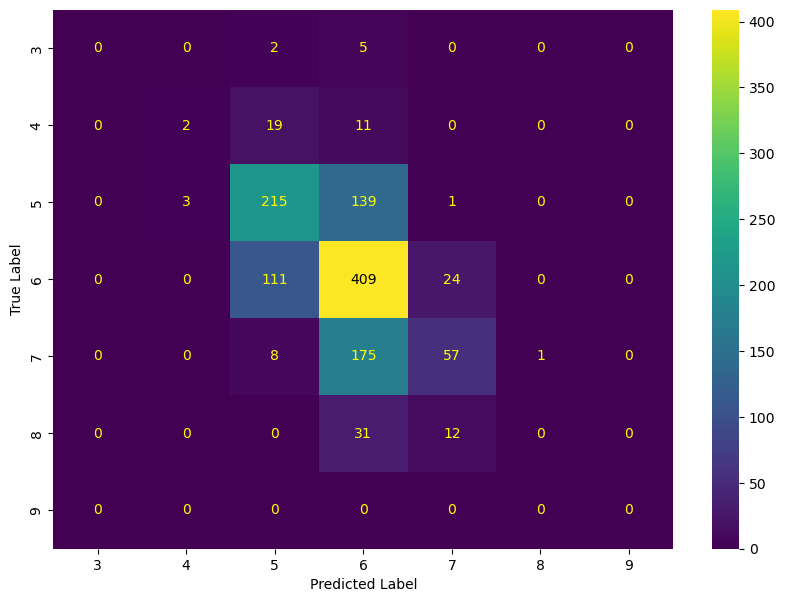

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Carregar os dados do arquivo CSV
file_path = 'winequality-white.csv'  # Substitua com o caminho correto do arquivo
data = pd.read_csv(file_path, sep=';')

# Divisão dos dados em treino e teste
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Separando as características e a variável alvo
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

# Criando e treinando o modelo SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svm_model.fit(X_train, y_train)

# Previsões com o conjunto de teste
y_pred = svm_model.predict(X_test)

# Avaliação do modelo
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=np.unique(data['quality']))

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='viridis', annot_kws={"color":'black'}, xticklabels=class_labels, yticklabels=class_labels)

# Obter o objeto de eixo atual
ax = plt.gca()

# Loop sobre as células de texto
for text in ax.texts:
    value = int(text.get_text())
    if value < 300:
        text.set_color('yellow')
    else:
        text.set_color('black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('')
plt.show()


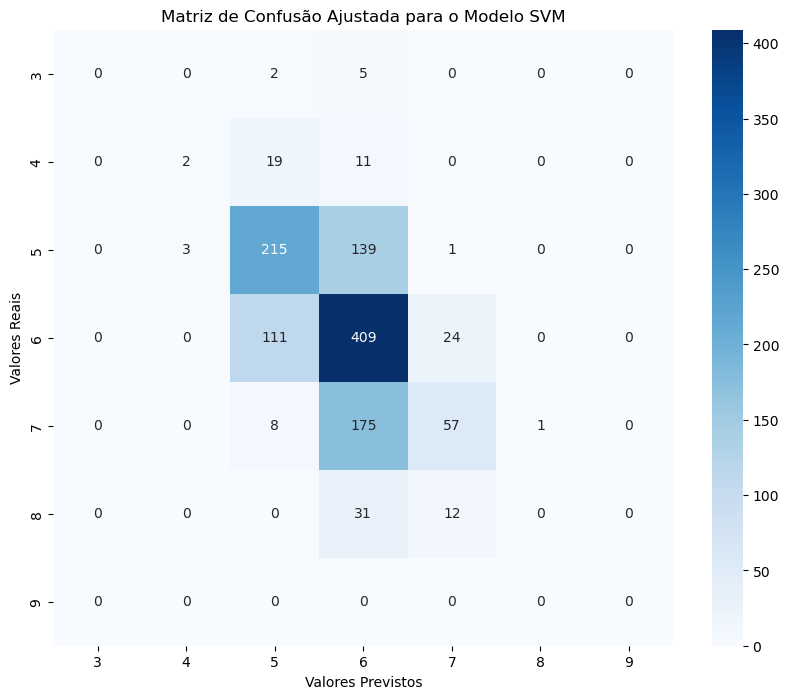

In [5]:
import numpy as np

# Ajustando os rótulos para a matriz de confusão
class_labels = np.unique(data['quality'])
confusion_mat_adjusted = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plotando a matriz de confusão ajustada
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_adjusted, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão Ajustada para o Modelo SVM')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()
